In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Mengubah parameter default matplotlib

In [3]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

### Load Dataset

In [4]:
df = pd.read_csv("Car_sales.csv")

In [5]:
df.sample(5)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
99,Mercedes-B,CL500,0.954,NaN,Passenger,85.500,5.0,302.0,113.6,73.1,196.6,4.115,23.2,20.0,4/11/2011,141.100985
24,Chevrolet,Corvette,17.947,36.225,Passenger,45.705,5.7,345.0,104.5,73.6,179.7,3.210,19.1,22.0,5/12/2012,141.141150
48,Ford,Contour,35.068,8.835,Passenger,17.035,2.5,170.0,106.5,69.1,184.6,2.769,15.0,25.0,8/20/2012,67.351011
9,BMW,528i,17.527,36.125,Passenger,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724
109,Oldsmobile,Intrigue,38.554,NaN,Passenger,24.150,3.5,215.0,109.0,73.6,195.9,3.455,18.0,NaN,4/1/2011,86.272523


# 1. Exploratory Data Analysis

#### Checking data type and null values using `df.info`

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

#### Grouping column by type

In [7]:
cats = ["Manufacturer", "Model", "Vehicle_type"]
nums = ["Sales_in_thousands", "__year_resale_value", "Price_in_thousands", "Engine_size", "Horsepower", "Wheelbase", "Width", "Length", "Curb_weight", "Fuel_capacity", "Fuel_efficiency", "Power_perf_factor"]
timestamp = ["Latest_Launch"]

In [8]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Sales_in_thousands,157.0,52.998076,68.029422,0.110000,14.114000,29.450000,67.956000,540.561000
__year_resale_value,121.0,18.072975,11.453384,5.160000,11.260000,14.180000,19.875000,67.550000
Price_in_thousands,155.0,27.390755,14.351653,9.235000,18.017500,22.799000,31.947500,85.500000
Engine_size,156.0,3.060897,1.044653,1.000000,2.300000,3.000000,3.575000,8.000000
Horsepower,156.0,185.948718,56.700321,55.000000,149.500000,177.500000,215.000000,450.000000
Wheelbase,156.0,107.487179,7.641303,92.600000,103.000000,107.000000,112.200000,138.700000
Width,156.0,71.150000,3.451872,62.600000,68.400000,70.550000,73.425000,79.900000
Length,156.0,187.343590,13.431754,149.400000,177.575000,187.900000,196.125000,224.500000
Curb_weight,155.0,3.378026,0.630502,1.895000,2.971000,3.342000,3.799500,5.572000
Fuel_capacity,156.0,17.951923,3.887921,10.300000,15.800000,17.200000,19.575000,32.000000


In [9]:
df[cats].describe().T

,count,unique,top,freq
Manufacturer,157,30,Dodge,11
Model,157,156,Neon,2
Vehicle_type,157,2,Passenger,116


#### Checking null values

In [10]:
df.isna().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

**There's null values in the multiple column**

#### Value count in the cats column

In [11]:
for col in cats:
    print(f'''Value count column {col}:''')
    print(df[col].value_counts())
    print()

Value count column Manufacturer:
Dodge         11
Ford          11
Toyota         9
Chevrolet      9
Mercedes-B     9
Mitsubishi     7
Nissan         7
Chrysler       7
Volvo          6
Oldsmobile     6
Lexus          6
Mercury        6
Pontiac        6
Volkswagen     6
Saturn         5
Cadillac       5
Honda          5
Plymouth       4
Acura          4
Buick          4
Audi           3
Jeep           3
Porsche        3
Hyundai        3
BMW            3
Lincoln        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: Manufacturer, dtype: int64

Value count column Model:
Neon          2
Integra       1
Cutlass       1
Sentra        1
Altima        1
             ..
Windstar      1
Expedition    1
Ranger        1
F-Series      1
S80           1
Name: Model, Length: 156, dtype: int64

Value count column Vehicle_type:
Passenger    116
Car           41
Name: Vehicle_type, dtype: int64



#### Boxplot

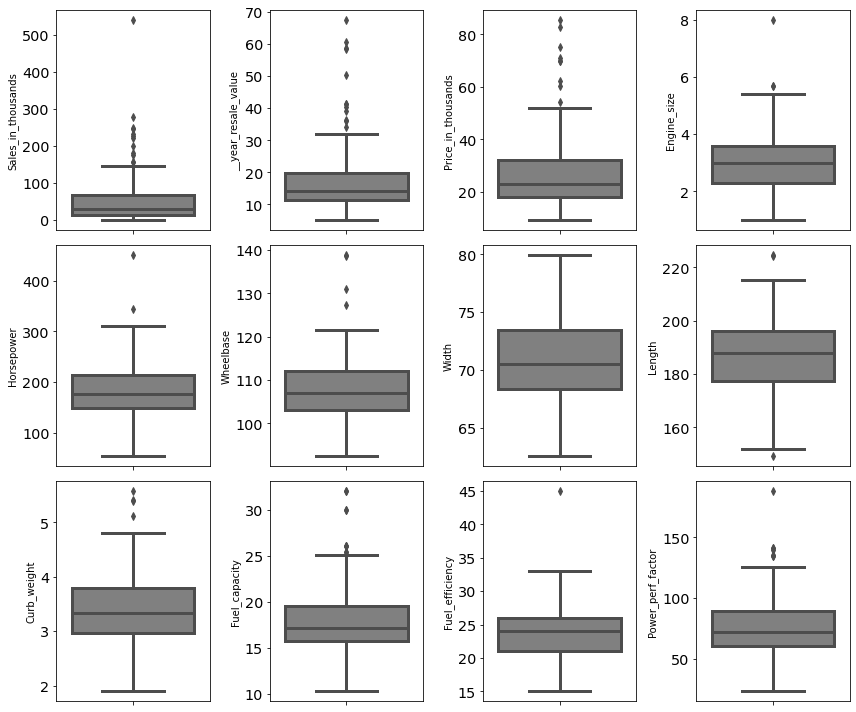

In [12]:
plt.figure(figsize=(12, 10))
for i in range(0, len(nums)):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

#### Violinplot

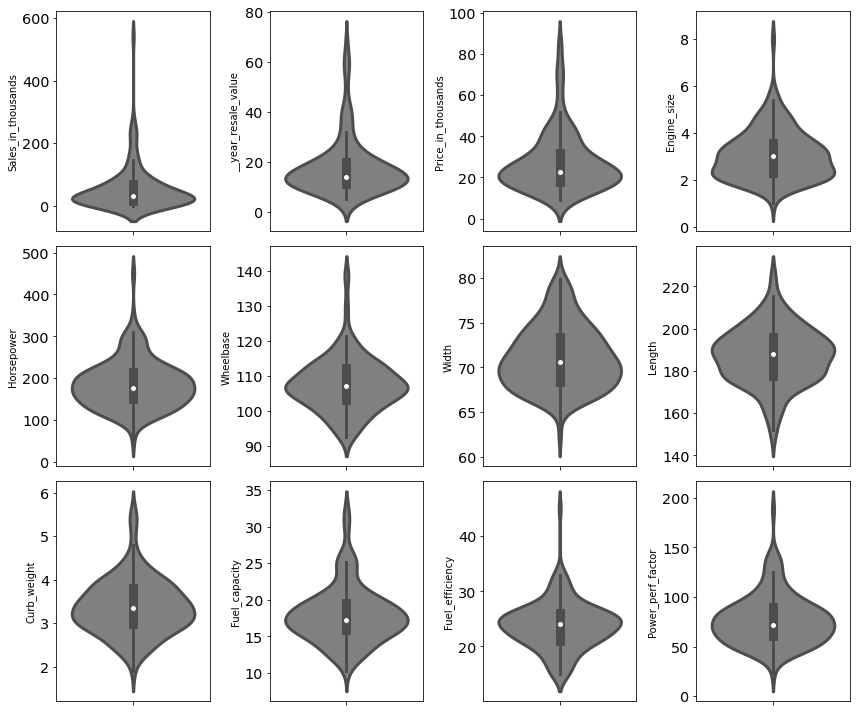

In [13]:
plt.figure(figsize=(12, 10))
for i in range(0, len(nums)):
    plt.subplot(3, 4, i+1)
    sns.violinplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

#### Countplot

C:\Users\priap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\priap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


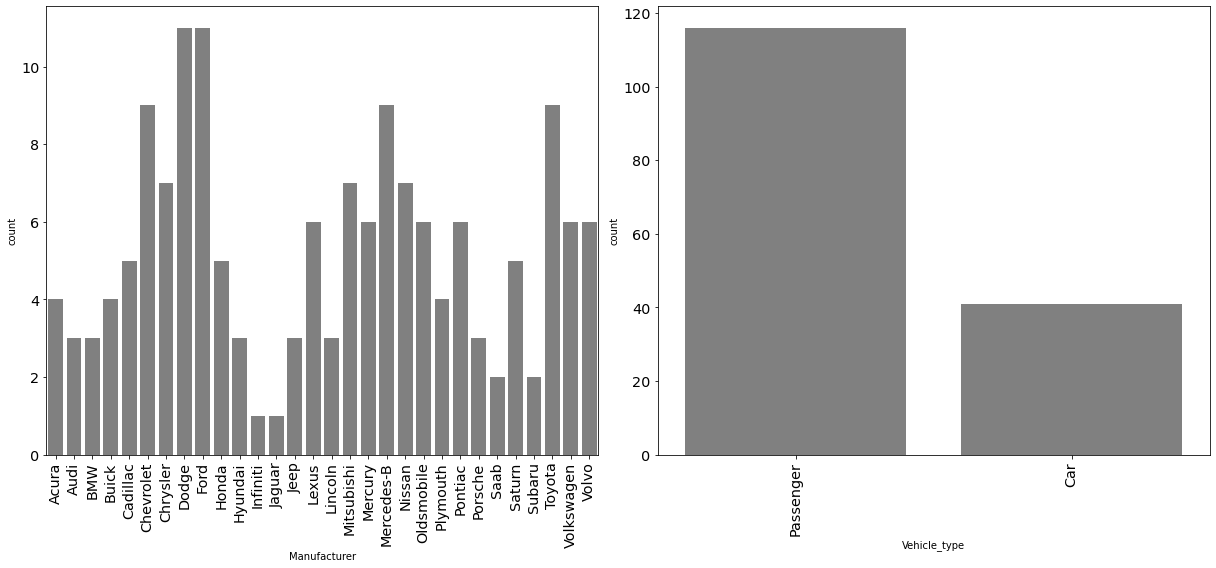

In [14]:
plt.figure(figsize=(17, 8))
for i in range(0, len(cats[0::2])):
    plt.subplot(1, len(cats[0::2]), i+1)
    sns.countplot(df[cats[0::2][i]], color='gray', orient='h')
    plt.tight_layout()
    plt.xticks(rotation=90)

In [15]:
df.corr()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.000000,-0.279034,-0.304734,0.019983,-0.197756,0.358179,0.140918,0.254980,0.008628,0.086540,-0.016764,-0.223252
__year_resale_value,-0.279034,1.000000,0.953840,0.531330,0.769081,-0.052270,0.178767,0.026548,0.361557,0.325567,-0.399880,0.827123
Price_in_thousands,-0.304734,0.953840,1.000000,0.626875,0.839744,0.110513,0.329136,0.156935,0.526224,0.423282,-0.492157,0.897945
Engine_size,0.019983,0.531330,0.626875,1.000000,0.837360,0.472130,0.690398,0.541424,0.760043,0.663022,-0.734622,0.818528
Horsepower,-0.197756,0.769081,0.839744,0.837360,1.000000,0.286308,0.539158,0.393364,0.610131,0.499907,-0.611332,0.992994
Wheelbase,0.358179,-0.052270,0.110513,0.472130,0.286308,1.000000,0.683135,0.839639,0.651016,0.654044,-0.497931,0.258852
Width,0.140918,0.178767,0.329136,0.690398,0.539158,0.683135,1.000000,0.710435,0.720927,0.656302,-0.602546,0.512025
Length,0.254980,0.026548,0.156935,0.541424,0.393364,0.839639,0.710435,1.000000,0.627163,0.563540,-0.446756,0.354095
Curb_weight,0.008628,0.361557,0.526224,0.760043,0.610131,0.651016,0.720927,0.627163,1.000000,0.863968,-0.818402,0.612071
Fuel_capacity,0.086540,0.325567,0.423282,0.663022,0.499907,0.654044,0.656302,0.563540,0.863968,1.000000,-0.801512,0.501184


<AxesSubplot:>

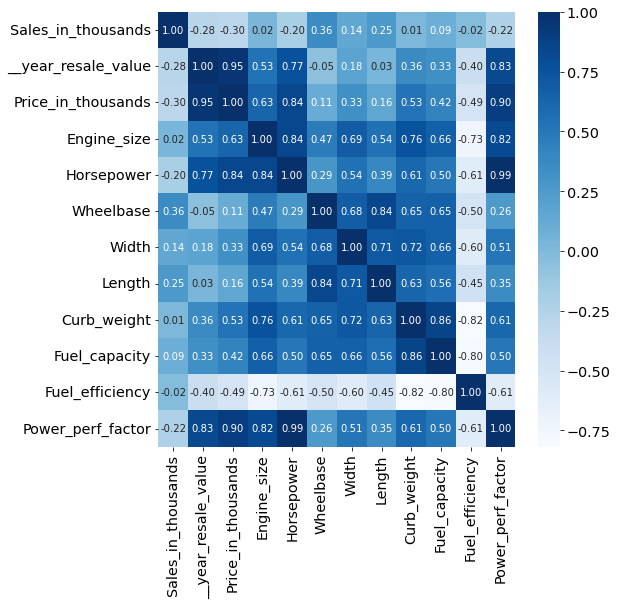

In [16]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

<Figure size 1080x1080 with 0 Axes>

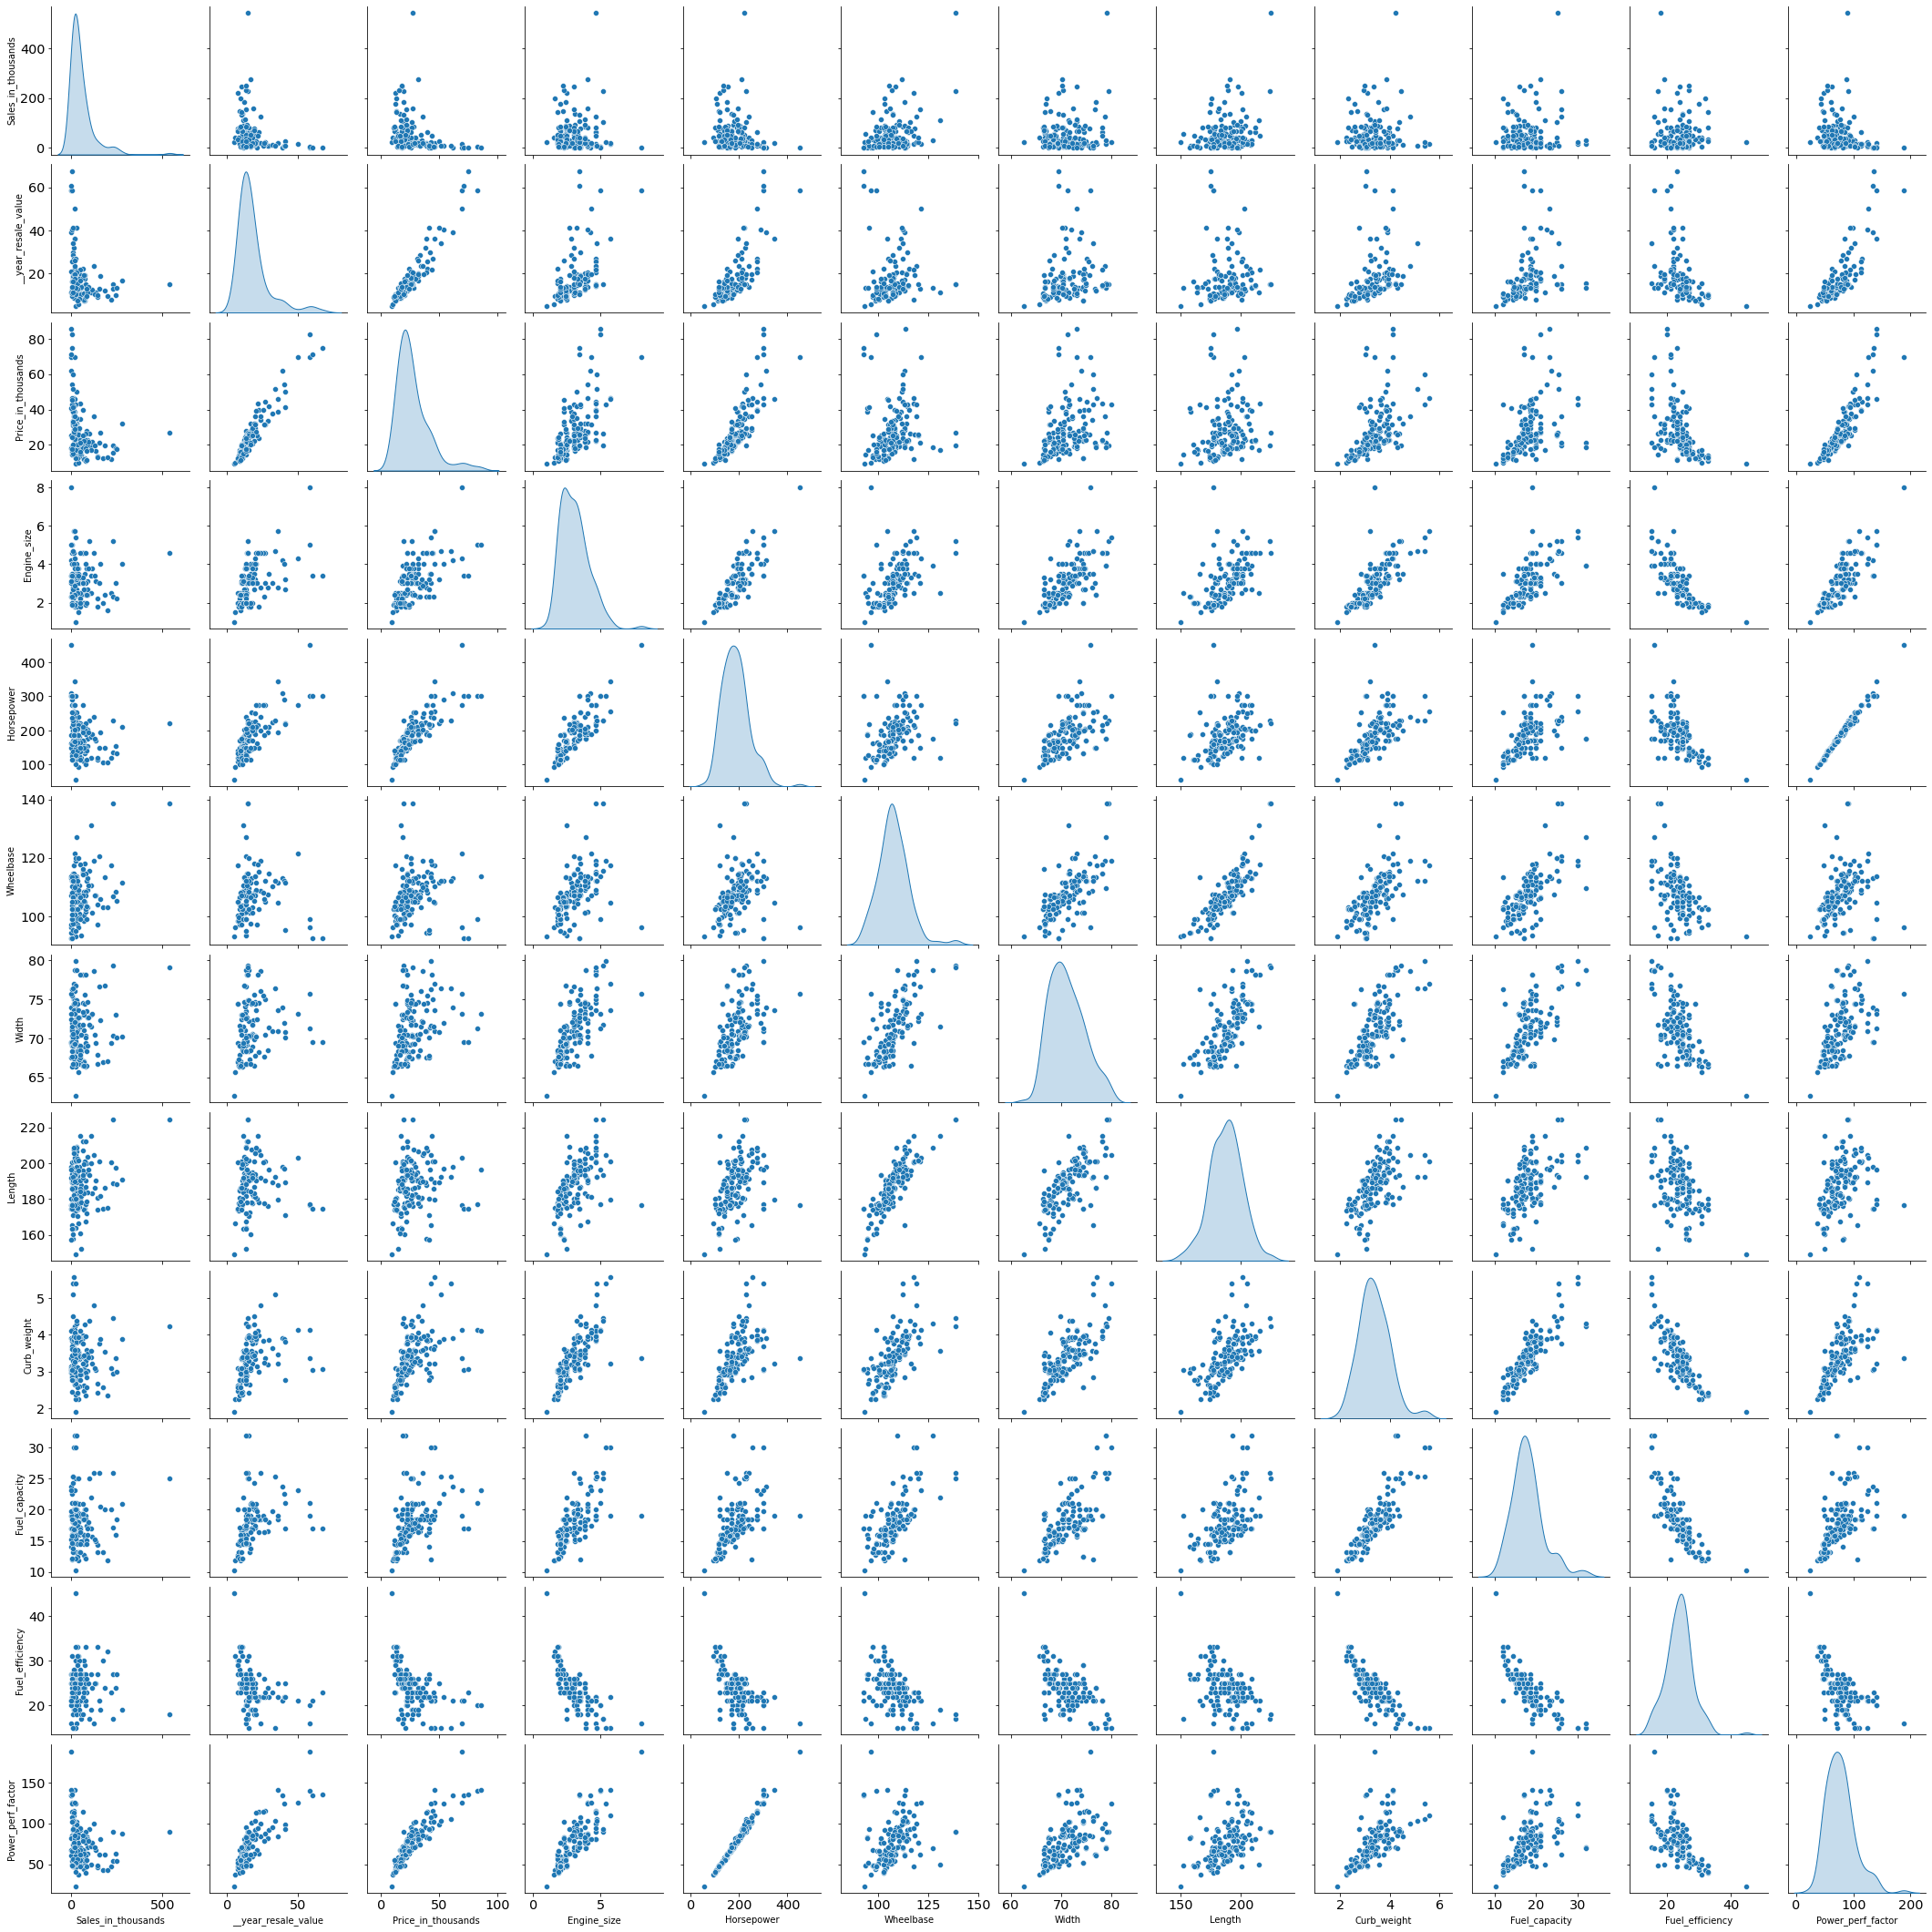

In [17]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')

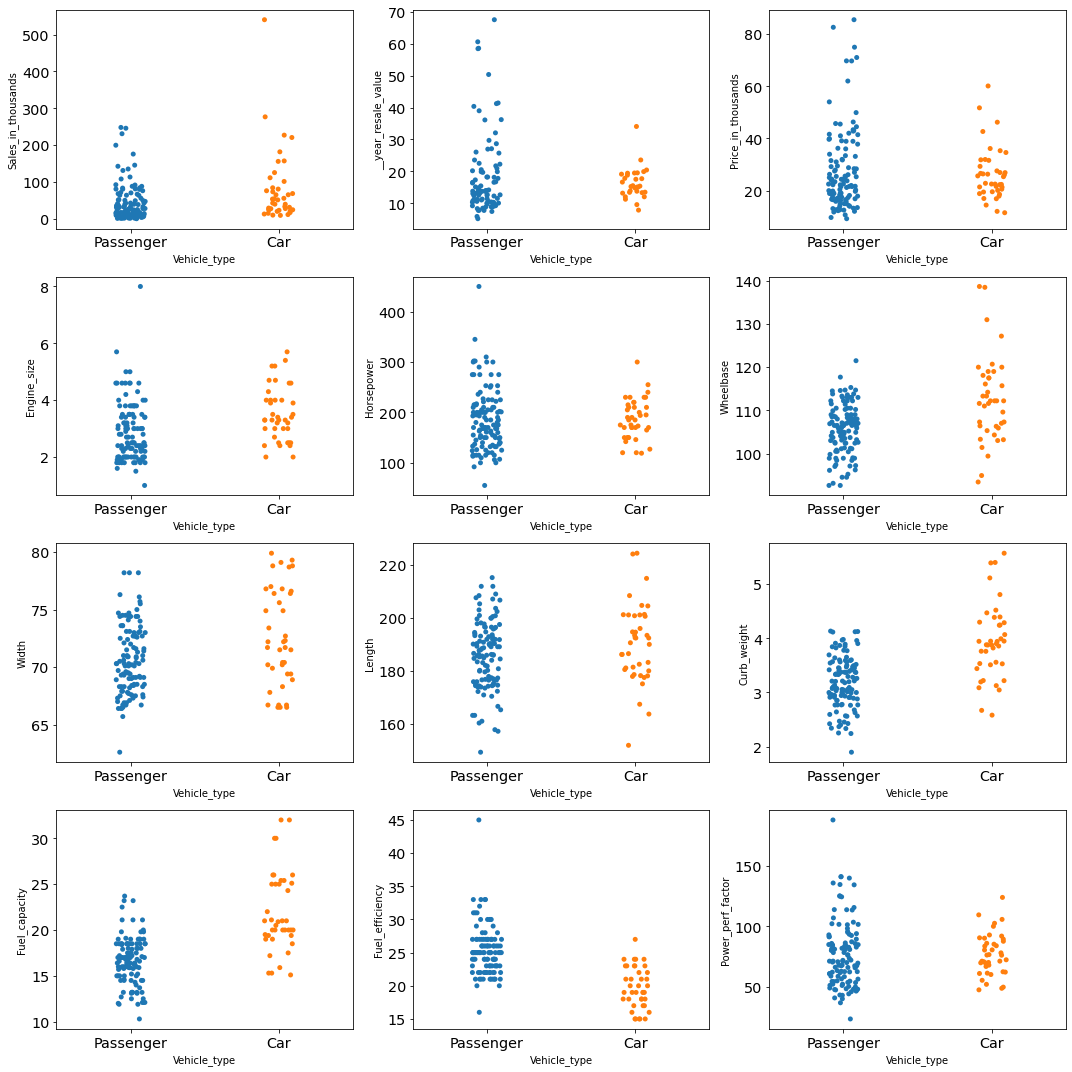

In [18]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Vehicle_type', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

# 2. Data Preprocessing

#### Imputation null value in numerical column with mean

In [19]:
df['__year_resale_value'].fillna(df['__year_resale_value'].mean(), inplace=True)
df['Price_in_thousands'].fillna(df['Price_in_thousands'].mean(), inplace=True)
df['Engine_size'].fillna(df['Engine_size'].mean(), inplace=True)
df['Horsepower'].fillna(df['Horsepower'].mean(), inplace=True)
df['Wheelbase'].fillna(df['Wheelbase'].mean(), inplace=True)
df['Width'].fillna(df['Width'].mean(), inplace=True)
df['Length'].fillna(df['Length'].mean(), inplace=True)
df['Curb_weight'].fillna(df['Curb_weight'].mean(), inplace=True)
df['Fuel_capacity'].fillna(df['Fuel_capacity'].mean(), inplace=True)
df['Fuel_efficiency'].fillna(df['Fuel_efficiency'].mean(), inplace=True)
df['Power_perf_factor'].fillna(df['Power_perf_factor'].mean(), inplace=True)

In [20]:
df.duplicated().sum()

0

No duplicate data

#### Handling outlier using z-score

In [22]:
from scipy import stats

In [23]:
print(f'Number of rows before filtering outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['__year_resale_value', 'Sales_in_thousands', 'Price_in_thousands', 'Engine_size',
           'Horsepower', 'Wheelbase', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency',
            'Power_perf_factor']:
    zscore = abs(stats.zscore(df[col])) # calculate absolute z-score
    filtered_entries = (zscore < 3) & filtered_entries # filter z-score < 3
    
df = df[filtered_entries] # get the z-score < 3

print(f'Number of rows after filtering outlier: {len(df)}')

Number of rows before filtering outlier: 157
Number of rows after filtering outlier: 141


#### Handling outlier using IQR

In [28]:
print(f'Number of rows before filtering outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['__year_resale_value', 'Sales_in_thousands', 'Price_in_thousands', 'Engine_size',
           'Horsepower', 'Wheelbase', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency',
            'Power_perf_factor']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Number of rows after filtering outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 141
Jumlah baris setelah memfilter outlier: 110


<AxesSubplot:xlabel='Sales_in_thousands', ylabel='Density'>

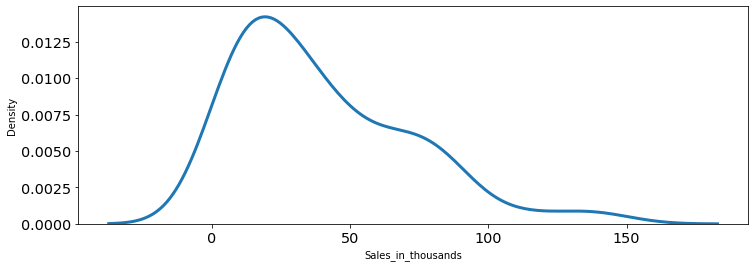

In [29]:
sns.kdeplot(df['Sales_in_thousands'])

#### Label Encoder

In [33]:
df.loc[0:,'Manufacturer'] = df.loc[0:,'Manufacturer'].astype('category').cat.codes
df.loc[0:,'Model'] = df.loc[0:,'Model'].astype('category').cat.codes
df.loc[0:,'Vehicle_type'] = df.loc[0:,'Vehicle_type'].astype('category').cat.codes

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         110 non-null    int8   
 1   Model                110 non-null    int8   
 2   Sales_in_thousands   110 non-null    float64
 3   __year_resale_value  110 non-null    float64
 4   Vehicle_type         110 non-null    int8   
 5   Price_in_thousands   110 non-null    float64
 6   Engine_size          110 non-null    float64
 7   Horsepower           110 non-null    float64
 8   Wheelbase            110 non-null    float64
 9   Width                110 non-null    float64
 10  Length               110 non-null    float64
 11  Curb_weight          110 non-null    float64
 12  Fuel_capacity        110 non-null    float64
 13  Fuel_efficiency      110 non-null    float64
 14  Latest_Launch        110 non-null    object 
 15  Power_perf_factor    110 non-null    flo

In [35]:
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,0,54,16.919,16.360,1,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,0,100,39.384,19.875,1,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,0,20,14.114,18.225,1,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,77.043591
4,1,6,20.397,22.255,1,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,1,7,18.780,23.555,1,33.950000,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
